<a href="https://colab.research.google.com/github/JanuNandhini/24AD004_DSV_Team13./blob/main/final_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# WEEK 3: DATA CLEANING SPRINT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("/content/Crime_Data_from_2020_to_Present.csv")

print("Missing values before cleaning:")
print(df.isnull().sum())

df.rename(columns={
    'Crm Cd Desc': 'Crime Description',
    'TIME OCC': 'Time',
    'DATE OCC': 'Date',
    'LAT': 'Latitude',
    'LON': 'Longitude'
}, inplace=True)

df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

Missing values before cleaning:
DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes           11246
Vict Age              1
Vict Sex          10864
Vict Descent      10867
Premis Cd             2
Premis Desc          38
Weapon Used Cd    55398
Weapon Desc       55398
Status                1
Status Desc           1
Crm Cd 1              3
Crm Cd 2          82153
Crm Cd 3          89164
Crm Cd 4          89382
LOCATION              1
Cross Street      72459
LAT                   1
LON                   1
dtype: int64


In [4]:
df['Crime Description'] = df['Crime Description'].fillna('Unknown')

df['Time'] = df['Time'].fillna(df['Time'].mode()[0])

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')


df['Time'] = df['Time'].astype(str).str.zfill(4)
df['Hour'] = df['Time'].str[:2].astype(int)

df = df[(df['Hour'] >= 0) & (df['Hour'] <= 23)]

In [5]:

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Hour'].apply(time_of_day)


df['Crime Description'] = df['Crime Description'].str.lower().str.strip()

In [6]:
crime_per_hour = df.groupby('Hour').size()

z_scores = np.abs(stats.zscore(crime_per_hour))
crime_per_hour_cleaned = crime_per_hour[z_scores < 3]

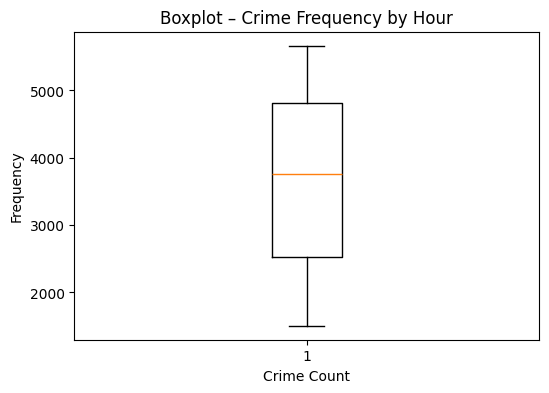

In [7]:
plt.figure(figsize=(6,4))
plt.boxplot(crime_per_hour.values)
plt.title("Boxplot – Crime Frequency by Hour")
plt.xlabel("Crime Count")
plt.ylabel("Frequency")
plt.show()

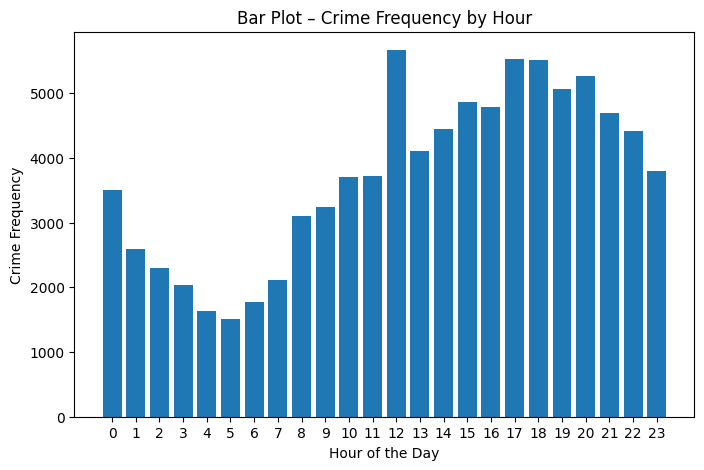

In [9]:
plt.figure(figsize=(8,5))
plt.bar(crime_per_hour.index, crime_per_hour.values)
plt.title("Bar Plot – Crime Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Crime Frequency")
plt.xticks(range(0,24))
plt.show()


In [8]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nCleaned dataset preview:")
print(df[['Date','Hour','Time_of_Day','Latitude','Longitude','Crime Description']].head())

df.to_csv("cleaned_crime_data.csv", index=False)


Missing values after cleaning:
DR_NO                    0
Date Rptd                0
Date                 89391
Time                     0
AREA                     0
AREA NAME                0
Rpt Dist No              0
Part 1-2                 0
Crm Cd                   0
Crime Description        0
Mocodes              11246
Vict Age                 0
Vict Sex             10863
Vict Descent         10866
Premis Cd                1
Premis Desc             37
Weapon Used Cd       55397
Weapon Desc          55397
Status                   0
Status Desc              0
Crm Cd 1                 2
Crm Cd 2             82152
Crm Cd 3             89163
Crm Cd 4             89381
LOCATION                 0
Cross Street         72458
Latitude                 0
Longitude                0
Hour                     0
Time_of_Day              0
dtype: int64

Cleaned dataset preview:
  Date  Hour Time_of_Day  Latitude  Longitude  \
0  NaT    21       Night   34.0375  -118.3506   
1  NaT    18     Even